In [1]:
# load data
import pandas as pd
veh = pd.read_csv('vehicles_(6).csv')

In [2]:
# size of the data frame
veh.shape

(1000, 7)

In [3]:
veh.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description
0,1,1,67.85,59,5,0,7
1,2,0,100.70,53,5,0,224
2,3,0,74.00,74,4,1,21
3,4,0,135.00,75,1,0,184
4,5,0,59.36,53,2,1,31


In [4]:
veh.describe()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.170000,87.940730,62.206000,3.008000,0.511000,90.792000
std,288.819436,0.375821,29.724589,16.082544,1.348983,0.500129,76.948644
min,1.000000,0.000000,32.760000,35.000000,1.000000,0.000000,1.000000
25%,250.750000,0.000000,64.942500,49.000000,2.000000,0.000000,25.000000
50%,500.500000,0.000000,83.930000,62.000000,3.000000,1.000000,57.500000
75%,750.250000,0.000000,107.010000,76.000000,4.000000,1.000000,158.000000
max,1000.000000,1.000000,174.440000,90.000000,5.000000,1.000000,250.000000


In [5]:
# check if have missing value
veh.isnull().sum()

vehicle_id           0
technology           0
actual_price         0
recommended_price    0
num_images           0
street_parked        0
description          0
dtype: int64

In [6]:
veh['price_delta'] = veh['actual_price'] - veh['recommended_price']
veh.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,price_delta
0,1,1,67.85,59,5,0,7,8.85
1,2,0,100.70,53,5,0,224,47.70
2,3,0,74.00,74,4,1,21,0.00
3,4,0,135.00,75,1,0,184,60.00
4,5,0,59.36,53,2,1,31,6.36


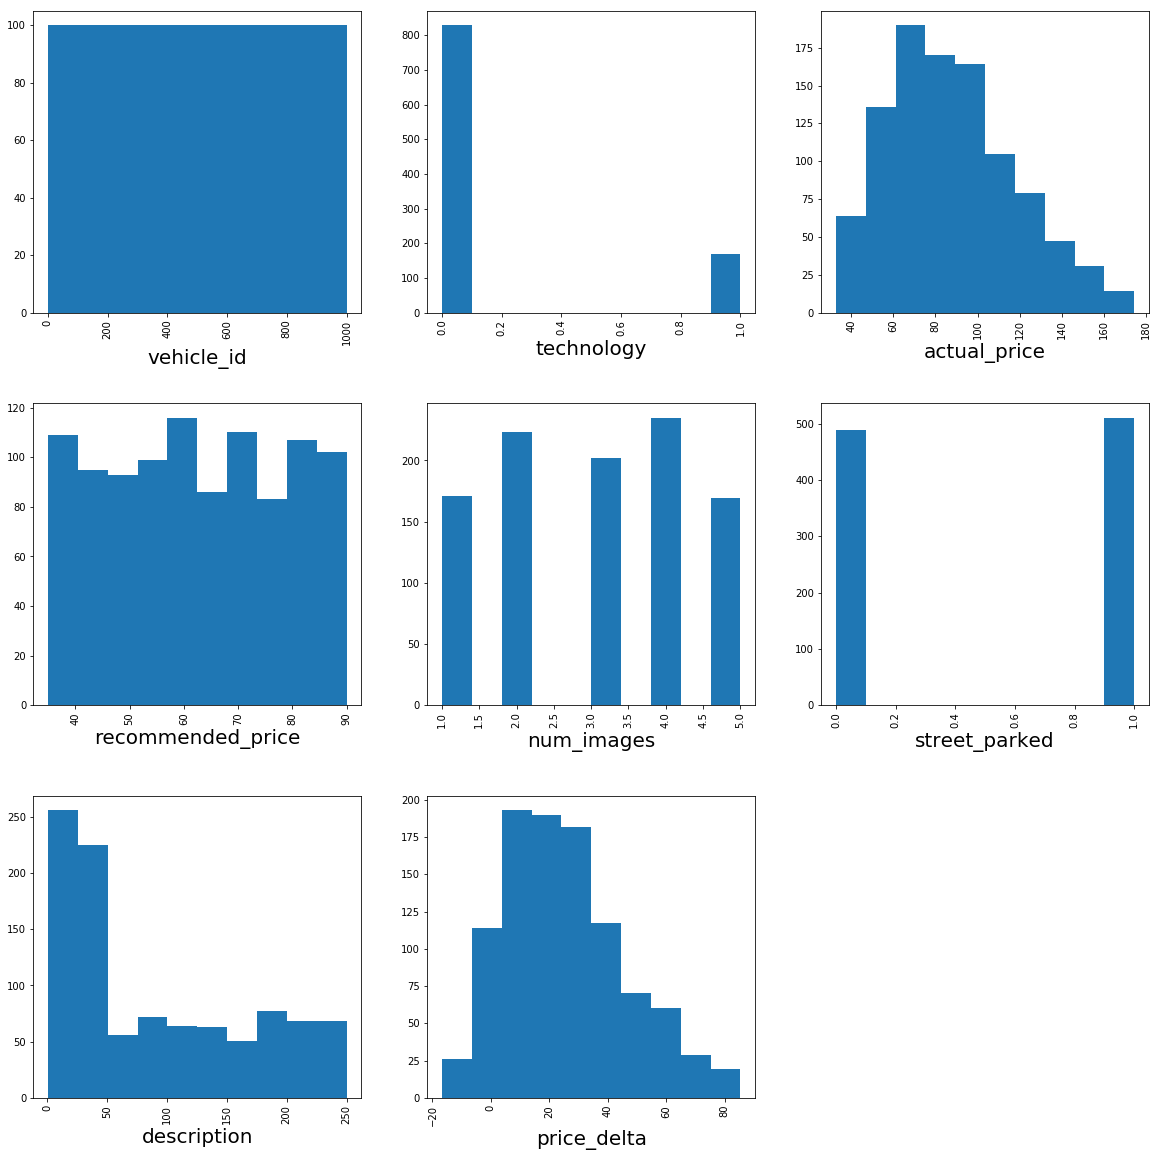

In [7]:
# overview of dataset and chek if have outlier
import matplotlib.pyplot as plt
%matplotlib inline

def plot_univariate(dataset):
    fig = plt.figure(figsize=(20, 20))
    for i, _ in enumerate(dataset):
        try:
            sub = plt.subplot(3,3, i+1)
            plt.xticks(rotation='vertical')
            plt.subplots_adjust(hspace=0.3) 
            sub.hist(dataset.iloc[:,i].dropna())
            sub.set_xlabel(dataset.columns[i], fontsize = 20)
            sub.set_xlabel_size(22)
        except:
            continue

plot_univariate(veh)

In [8]:
# load the extra dataset
res = pd.read_csv('reservations.csv')
res.head()

,Unnamed: 0,vehicle_id,n_hourly,n_daily,n_weekly,total_reservations
0,0,1,1.0,NaN,NaN,1
1,1,2,4.0,3.0,NaN,7
2,2,3,1.0,9.0,7.0,17
3,3,4,1.0,NaN,1.0,2
4,4,6,4.0,4.0,5.0,13


In [9]:
# combine extra dataset into vehicles dataset, drop invalid column created by dataframes
# check the number of missing values
data = pd.merge(veh, res, on='vehicle_id', how='outer')
data = data.drop(['Unnamed: 0'], axis=1)
data.isnull().sum()

vehicle_id              0
technology              0
actual_price            0
recommended_price       0
num_images              0
street_parked           0
description             0
price_delta             0
n_hourly              239
n_daily               240
n_weekly              239
total_reservations     89
dtype: int64

In [10]:
# use zero to fill missing value
data.fillna(0, inplace=True)

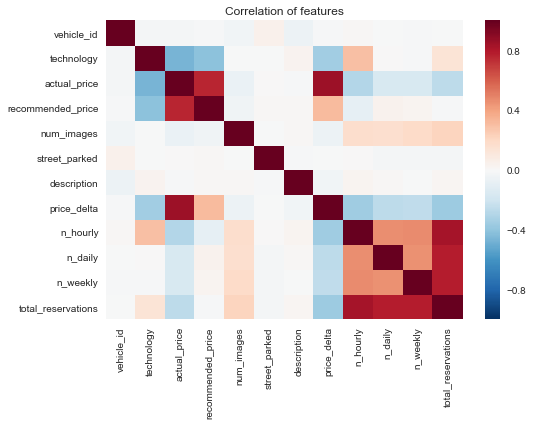

In [11]:
# overviw, see the correlation of each features
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
sns.plt.title('Correlation of features')

### Stronger correlation of features

1- Technology with price and the number of reservations.  
2- Actual price with technology, recommended price, price detal, and the number of reservations.  
3- Recommended price with technology, actual price, price detal, and the number of reservations?  
4- Price detal with technology, actual price, recommended price, and the number of reservations? 
4- The number of images with the number of reservations?  
5- The number of rented by hourly with technology, price, the number of images and the number of reservations.  
6- The number of rented by daily or weekly with price, the number of images and the number of reservations.  
7- Total reservations with technology, price, the number of images and the number of reservations.  
8- Street-parked and description have not impact to reservations.

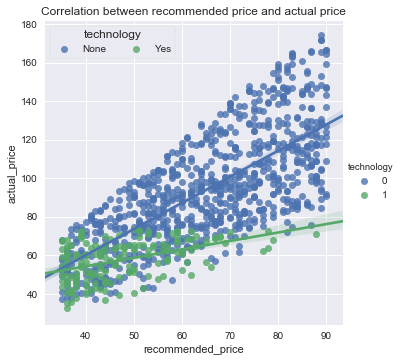

In [12]:
sns.lmplot(x='recommended_price',y='actual_price', hue='technology', data=data)
leg = plt.legend(title='technology', ncol=2, frameon=True)
for n, technology in enumerate(['None', 'Yes']):
    leg.get_texts()[n].set_text(technology)
sns.plt.title('Correlation between recommended price and actual price')

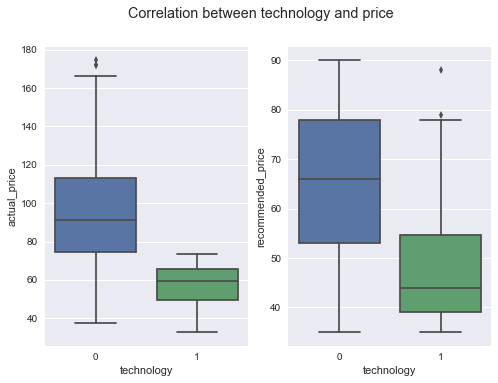

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.boxplot(x='technology', y='actual_price', data=data, ax=ax1)
sns.boxplot(x='technology', y='recommended_price', data=data, ax=ax2)
sns.plt.suptitle('Correlation between technology and price')

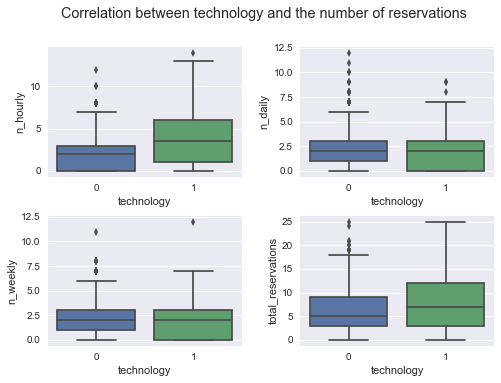

In [14]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.boxplot(x='technology', y='n_hourly', data=data, ax=ax1)
sns.boxplot(x='technology', y='n_daily', data=data, ax=ax2)
sns.boxplot(x='technology', y='n_weekly', data=data, ax=ax3)
sns.boxplot(x='technology', y='total_reservations', data=data, ax=ax4)
sns.plt.suptitle('Correlation between technology and the number of reservations')

In [15]:
def corr_1(x):
    sns.lmplot(x=x, y='price_delta', hue='technology', data=data)
    leg = plt.legend(title='technology', ncol=2, frameon=True)
    for n, technology in enumerate(['None', 'Yes']):
        leg.get_texts()[n].set_text(technology)
    sns.plt.title('Correlation between ' + x + ', price_delta and technology')

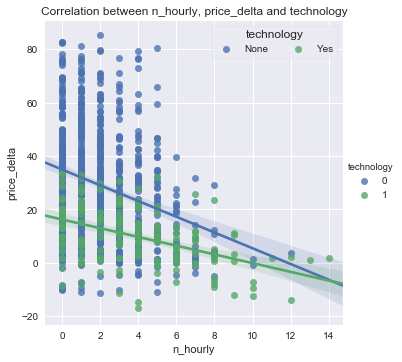

In [16]:
corr_1('n_hourly')

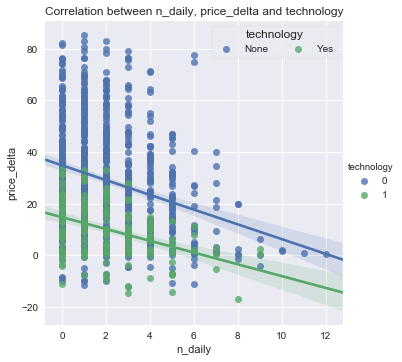

In [17]:
corr_1('n_daily')

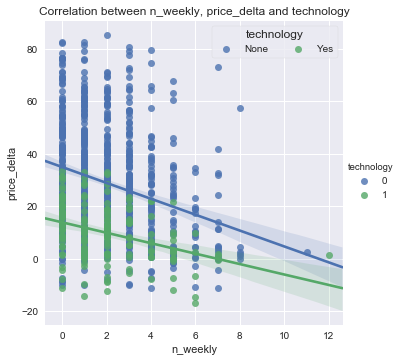

In [18]:
corr_1('n_weekly')

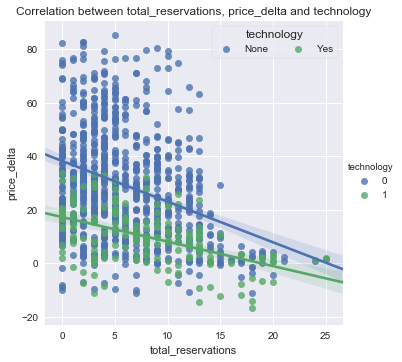

In [19]:
corr_1('total_reservations')

In [20]:
def corr_2(x):
    sns.lmplot(x=x, y='actual_price', hue='technology', data=data)
    leg = plt.legend(title='technology', ncol=2, frameon=True)
    for n, technology in enumerate(['None', 'Yes']):
        leg.get_texts()[n].set_text(technology)
    sns.plt.title('Correlation between ' + x + ', actual_price and technology')

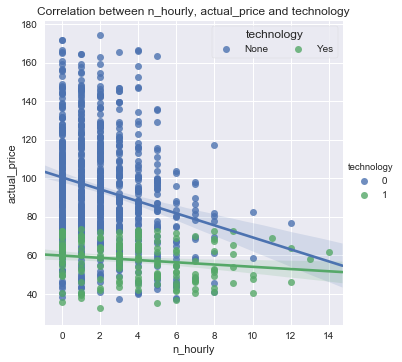

In [21]:
corr_2('n_hourly')

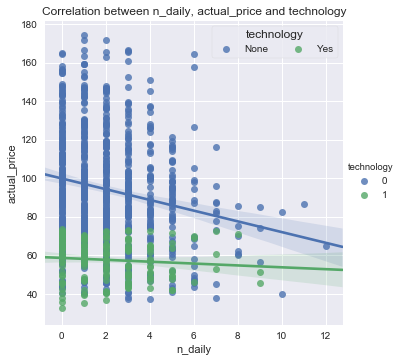

In [22]:
corr_2('n_daily')

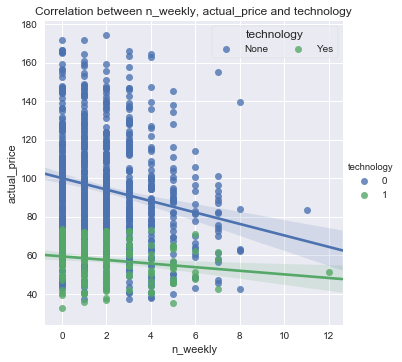

In [23]:
corr_2('n_weekly')

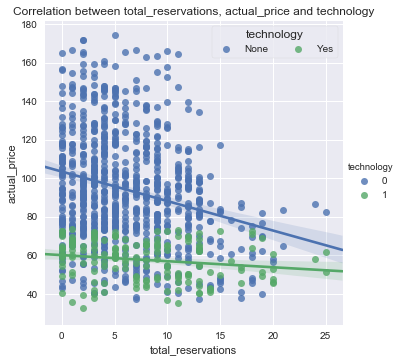

In [24]:
corr_2('total_reservations')

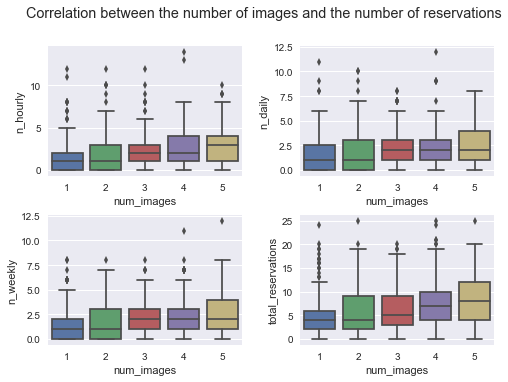

In [25]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.boxplot(x='num_images', y='n_hourly', data=data, ax=ax1)
sns.boxplot(x='num_images', y='n_daily', data=data, ax=ax2)
sns.boxplot(x='num_images', y='n_weekly', data=data, ax=ax3)
sns.boxplot(x='num_images', y='total_reservations', data=data, ax=ax4)
sns.plt.suptitle('Correlation between the number of images and the number of reservations')

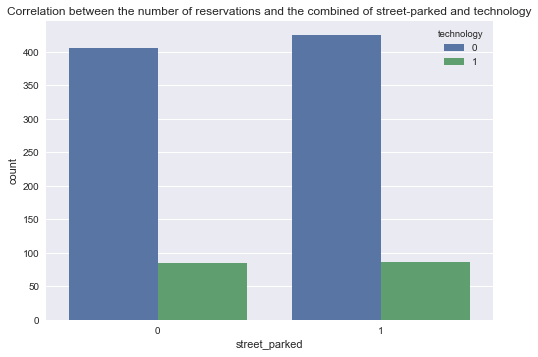

In [26]:
# extra extra investigate combined of street parked and technology
sns.countplot(x='street_parked', hue='technology', data=data)
sns.plt.title('Correlation between the number of reservations and the combined of street-parked and technology')